# Moving Average Converge/Divergence (MACD)

In [1]:
import os
setup_script = os.path.join(os.environ['ENV_JUPYTER_SETUPS_DIR'], 'setup_sci_env_basic.py')
%run $setup_script

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
load_mpl_style('single_plot.mplstyle')
ignore_warnings()

**Moving average converge divergence (RSI)** is defined as:

$$
\begin{equation}
    \text{MACD}(x,a,b) = \text{EWMA}(x,a) - \text{EWMA}(x,b)
\end{equation}
$$

> A "signal-line crossover" occurs when the MACD and average lines cross; that is, when the divergence changes sign. The standard interpretation of such an event is a recommendation to buy if the MACD line crosses up through the average line (a "bullish" crossover), or to sell if it crosses down through the average line (a "bearish" crossover). These events are taken as indications that the trend in the stock is about to accelerate in the direction of the crossover.

**References:**
- https://en.wikipedia.org/wiki/MACD
- https://www.investopedia.com/terms/m/macd.asp
- http://pandas.pydata.org/pandas-docs/stable/computation.html#exponentially-weighted-windows
- https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average
- https://www.linkedin.com/pulse/python-tutorial-macd-moving-average-andrew-hamlet
- https://stackoverflow.com/questions/38270524/cannot-calculate-macd-via-python-pandas

Load FTSE100 tickers

In [3]:
ftse100 = pd.read_csv('./ftse100_tickers.dat')

Load and merge price data

In [4]:
df = pd.DataFrame()
for ticker in ftse100['ticker']:
    df_ = pd.read_csv('./data/{}.dat'.format(ticker))
    df_['ticker'] = ticker
    if df.empty:
        df = df_
    else:
        df = df.append(df_)

In [5]:
df.set_index(['ticker', 'Date'], inplace=True)

Selecting a single security and width of the rolling window

In [6]:
security = 'BARC.L'
window = 14

In [7]:
close = df.loc[security]['Adj Close']

In [8]:
window_slow = 26
window_fast = 12

In [9]:
uwma_slow = pd.rolling_mean(close, window_slow)
uwma_fast = pd.rolling_mean(close, window_fast)

In [10]:
com_fast = 12
com_slow = 26
com_signal = 9

In [11]:
ewma_slow = pd.ewma(close, com_slow)
ewma_fast = pd.ewma(close, com_fast)

In [12]:
macd_uwma = uwma_fast - uwma_slow
macd_ewma = ewma_fast - ewma_slow

In [13]:
macd_ewma_signal = pd.ewma(macd_ewma, com_signal)

In [14]:
divergence = macd_ewma - macd_ewma_signal

In [15]:
start = -300

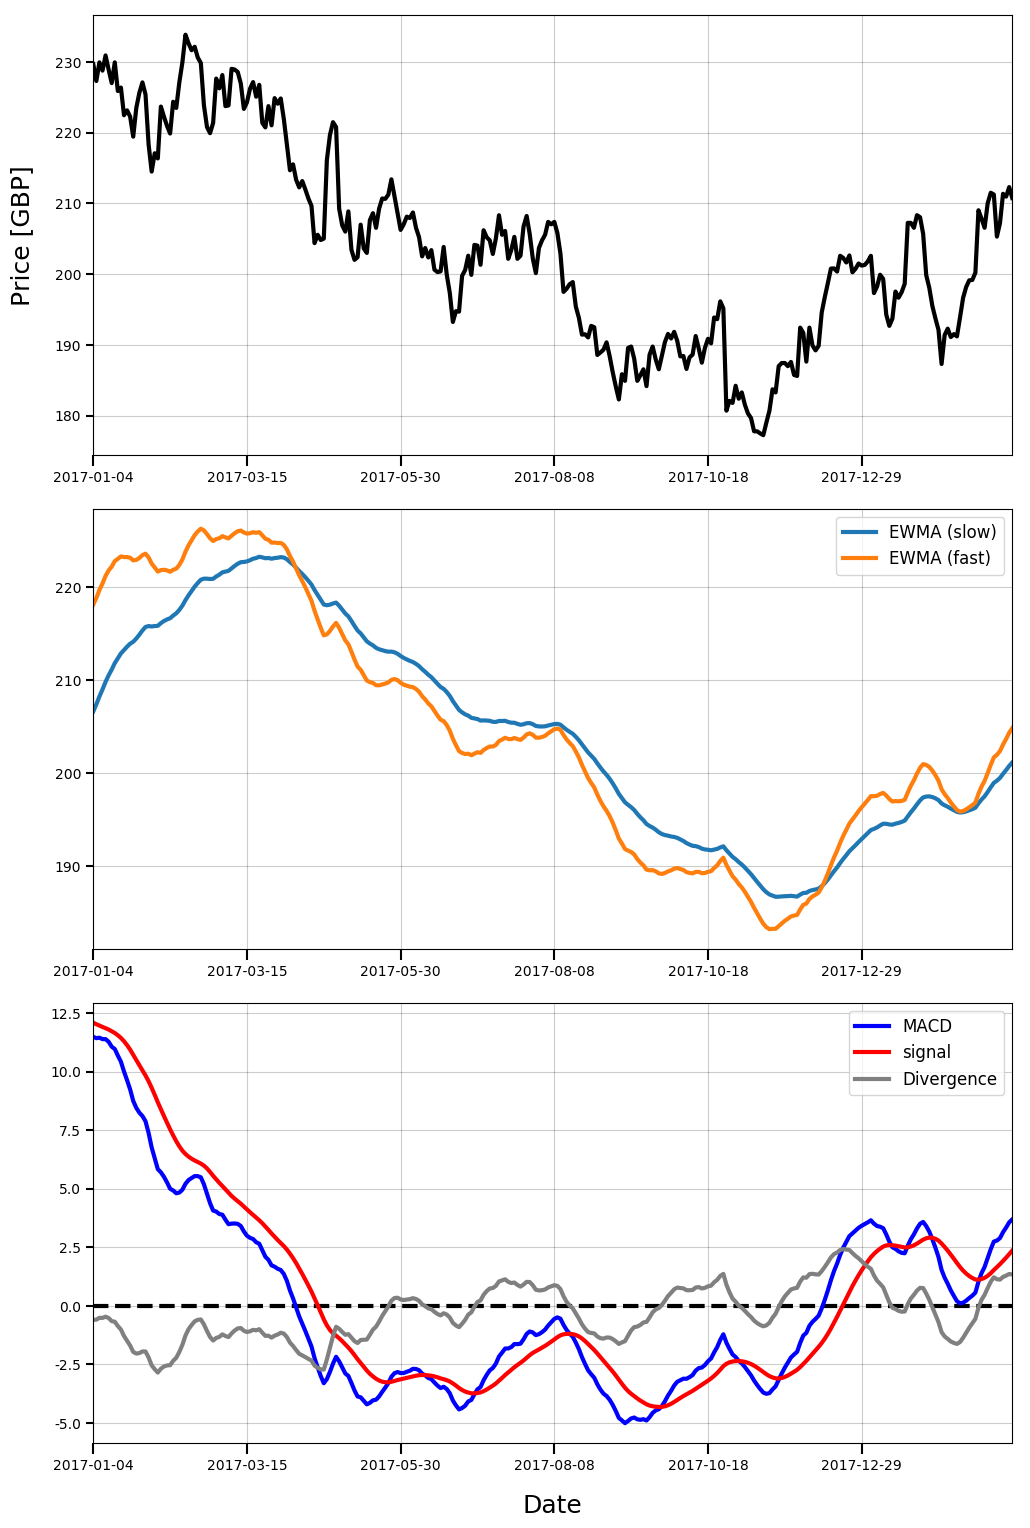

In [21]:
f,(a1,a2,a3) = plt.subplots(nrows=3, figsize=(10,15), dpi=100)
f.tight_layout()
close[start:].plot(ax=a1, c='k')
#uwma_slow[start:].plot(ax=a2)
#uwma_fast[start:].plot(ax=a2)
ewma_slow[start:].plot(ax=a2, linestyle='-', label='EWMA (slow)', legend=True)
ewma_fast[start:].plot(ax=a2, linestyle='-', label='EWMA (fast)', legend=True)
#macd_uwma[start:].plot(ax=a3)
macd_ewma[start:].plot(ax=a3, linestyle='-', c='b', label='MACD', legend=True)
macd_ewma_signal[start:].plot(ax=a3, linestyle='-', c='red', label='signal', legend=True)
divergence[start:].plot(ax=a3, c='grey', label='Divergence', legend=True)
a1.set_xlabel('')
a1.set_ylabel('Price [GBP]')
a2.set_xlabel('')
a3.hlines(0, 0, 1e3, linestyle='--');